# 3. Plotting Basics

A plot is a graphical representation of a data set, showing the relationship between two or more variables. They are useful because we can quickly derive an understanding which would not come from raw lists of values. Inspecting a chart can make large amounts of information easy to digest and interpret.

The main purpose of a chart is to convey information clearly and accurately. Aesthetically pleasing charts often make consumption more enjoyable and can help deliver the message more effectively. But they carry meaning — never should clarity be sacrificed for visual embelishments.

Always try to keep your charts simple. Allow the audience to focus on the essential information, without overwhelming them with unnecessary noise.

> Perfection is achieved not when there is nothing more to add, but when there is nothing left to take away

**👾 Trivia**: the following terms are most often interchangeable, but for the most pedantic of readers, here are the semantic differences:
 - **graph**: shows a mathematical function (a line, usually continuous)
 - **plot**: observations marked on a coordinate system (points, usually continuous x/y axes)
 - **chart**: graphic representation of data (e.g.: bars, axes usually discrete)
 - **diagram**: an illustrative figure

---

### Table of contents


- Matplotlib
 - Fundamental Charts
   - Line
   - Bar
   - Scatter
   - No Pie
   - Derivative Chart Types
 - Customization
   - Line Properties
   - Marker Properties
   - Figure Properties
 - Multiple Plots
   - Same Figure
   - Multiple Figures
   - Subplots
   - Twin Axes
 - Plotting effectively
  - Simplicity
   - Number Precision
   - Decluttering
  - Thoroughness
   - Labels
   - Units
  - Appropriate
   - Truncating
   - Aspect Ratio
   - Scale Type
  - Transformation Examples

---

In [1]:
import numpy as np   # we'll use numpy to generate dummy data
import pandas as pd  # we'll use pandas to read and manipulate datasets

**ℹ️ Tip**: packages often make use of other packages. Sometimes the developer does not keep them updated, leading to deprecation warnings. Since they are intended for the package's maintainer, there is nothing you can do to solve them. You can all such warnings (even ones caused by you) like this:

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

## 3a. Matplotlib

Matplotlib is the de-facto Python library for creating attractive charts. It has a friendly interface, making basic plotting simple but also allowing power users to fully customize plots.

**👾 Trivia**: the package's name comes from _MATLAB-style plotting library_. This is because the syntax and functionality was initially heavily inspired by MATLAB's `plot` command.

In [3]:
import matplotlib.pyplot as plt
# display figures alongside cell output
%matplotlib inline

**ℹ️ Tip**: increase the DPI of figures for crispier charts (but larger image size):

In [4]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 100  # make figures large
%config InlineBackend.figure_format = 'retina'  # make figures crisp

---

Plot some values:

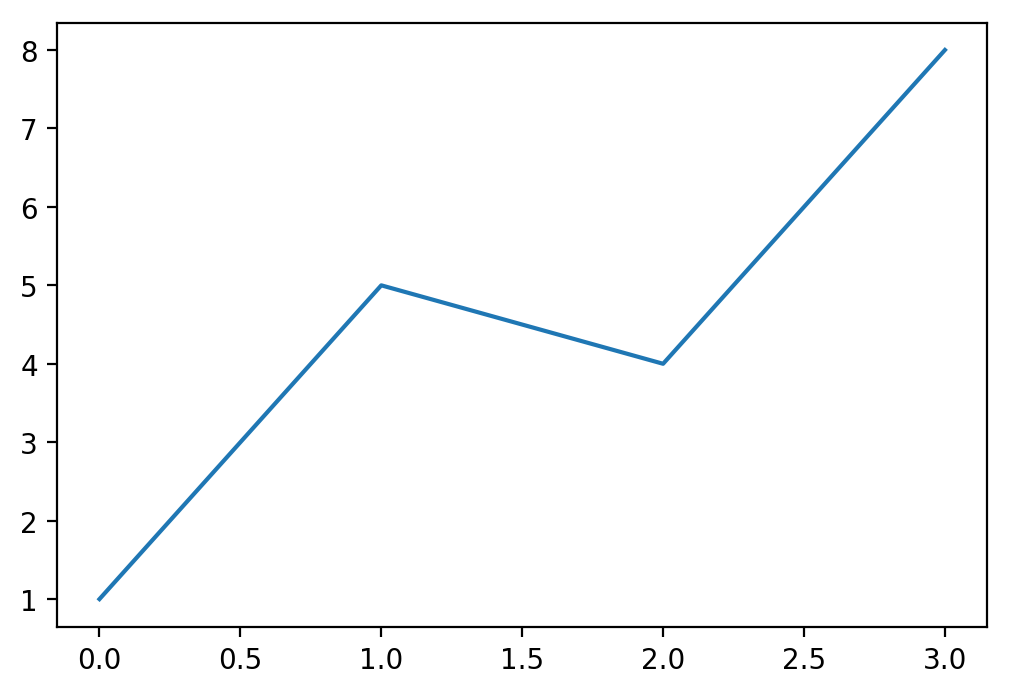

In [5]:
plt.plot([1, 5, 4, 8]);

**ℹ️ Tip**: In other environments, it'd be required to call `plt.show()` in order to display the chart, but thanks to the `%matplotlib inline` magic, that is no longer needed. For cells that display multiple charts, `plt.show()` still has to be called after each chart. Also we are using the `;` trick to supress the output, which is just the memory address of a matplotlib object.

Provide both axes values:

In [6]:
x = 1, 2, 4
y = 5, 4, 7

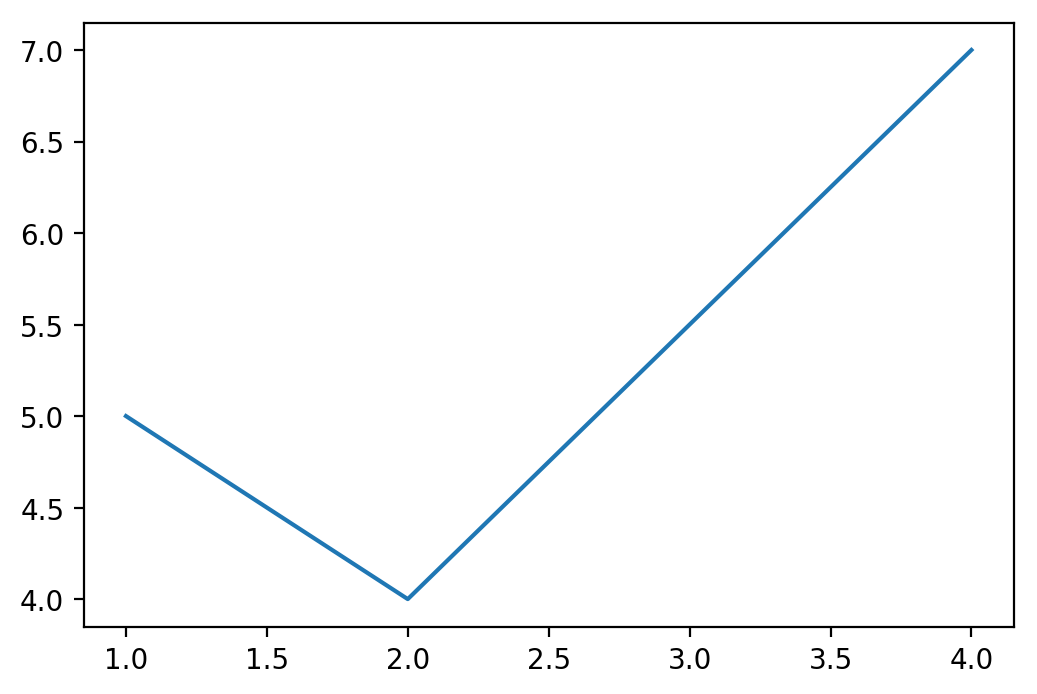

In [7]:
plt.plot(x, y);

### Fundamental Charts

How and when to use the various types of basic charts

#### Line

Line charts display information as a series of data points connected by straight lines.  It is used to visualize a trend in data over a sequential variable, such as time. The horizontal axis is a (discretized) continuous variable and the vertical axis represents a measured value.

In [8]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
price = [  70,   72,   79,   80,   85,   77]

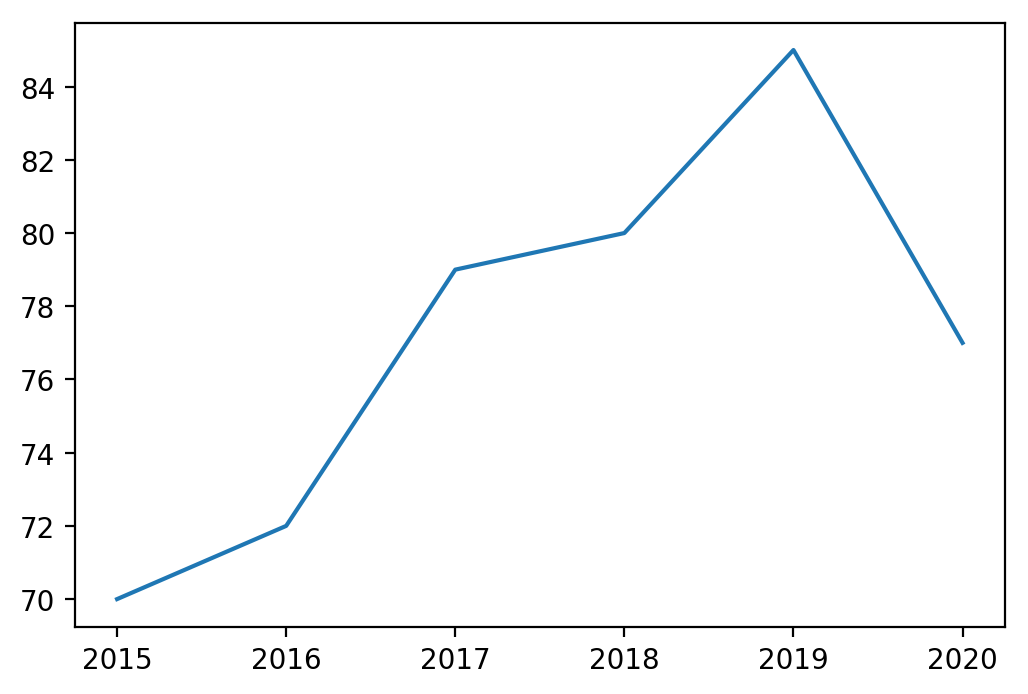

In [9]:
plt.plot(years, price);

#### Bar

Bar charts present categorical data with bars of lengths proportional to the variable they represent. It is used to compare discretely-indexed values. The horizontal axis shows a discrete variable and the vertical axis represents a measured value.

In [10]:
companies = ['Stark Ind.', 'Wayne Ent.', 'Lexcorp', 'Oscorp', 'ACME']
valuation = [41, 37, 31, 26, 24]

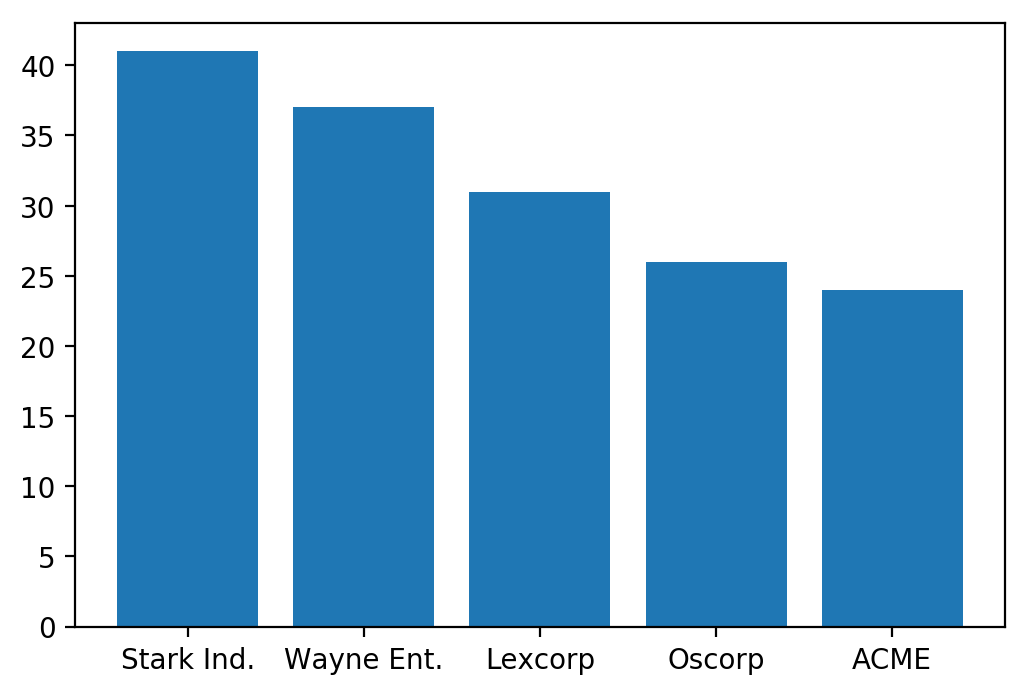

In [11]:
plt.bar(companies, valuation);

**ℹ️ Tip**: unless there is a specific reason not to, order data points either ascendingly or descendingly.

**ℹ️ Tip**: multi-line labels can be achieved by placing `\n` inside the label string. When possible, shorter labels should be preferred.

#### Scatter

A scatter plot displays values for two variables as a collection of points. It is used to identify the relationship between two variables. The position of each point is by one variable on the horizontal axis and the other variable on the vertical axis.

In [12]:
height = [146, 152, 161, 164, 166, 171, 174, 178, 185, 195]
weight = [ 54,  59,  79,  75,  73,  82,  85,  84,  92,  94]

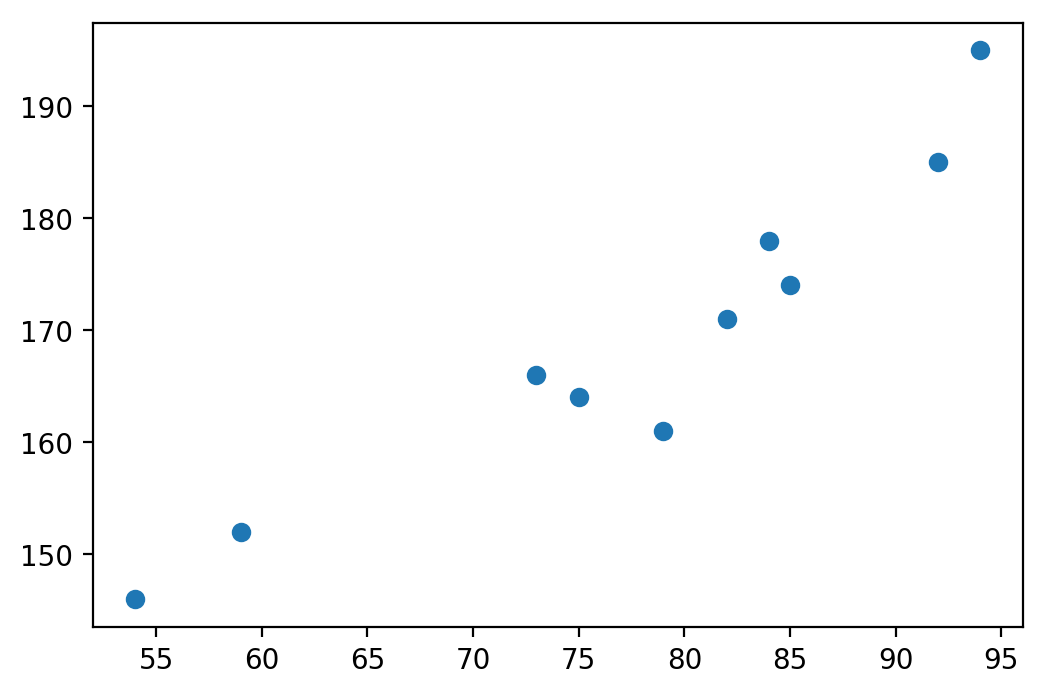

In [13]:
plt.scatter(weight, height);

#### No Pie

Pie charts appear deceitfuly friendly, but in reality, the data can almost always be presented in a better format. The human eye has evolved to be able to compare linear distances. It is difficult to tell the difference between angles, especially when precision is important.

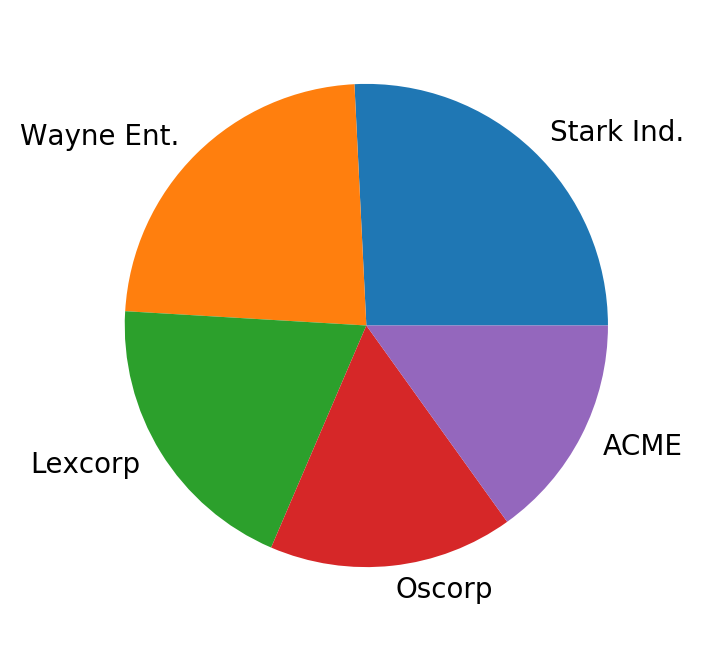

In [14]:
plt.pie(valuation, labels=companies)
plt.gca().set_aspect('equal')

Whichone is larger, _ACME_ or _Lexcorp_? As shown before, the data can be much more efficiently presented in the form of a bar chart. Even for such few data points, angular distances are hard to interpret. 

The only time pie charts can be efficient is when you have very very few slices:

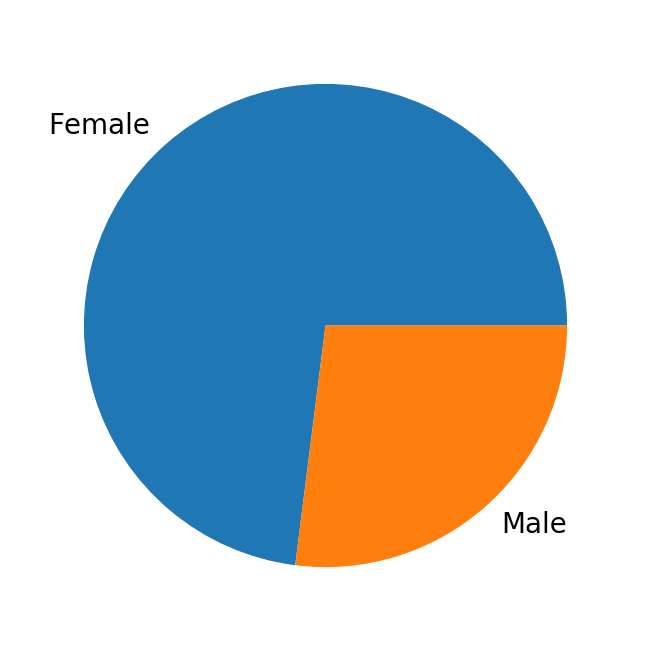

In [15]:
plt.pie([.73, .27], labels=['Female', 'Male'])
plt.gca().set_aspect('equal')

Even in this case, just showing the single number is more effective: _73% Female_. 

**AVOID PIE CHARTS!**

**ℹ️ Tip**: area charts, in general, are less efficient, because it is harder to compare areas than lengths. We usually underestimate the size of bigger shapes and overestimate the size of the smaller ones, because we instinctively judge the lengths or widths and not their areas.

#### Derivative Chart Types

The basic charts can be expanded with options into derivative ones

##### Negative Bar Charts

The regular bar chart can also be used to display negative values. In case positive values are displayed as well, the zeroline makes comparisons easier:

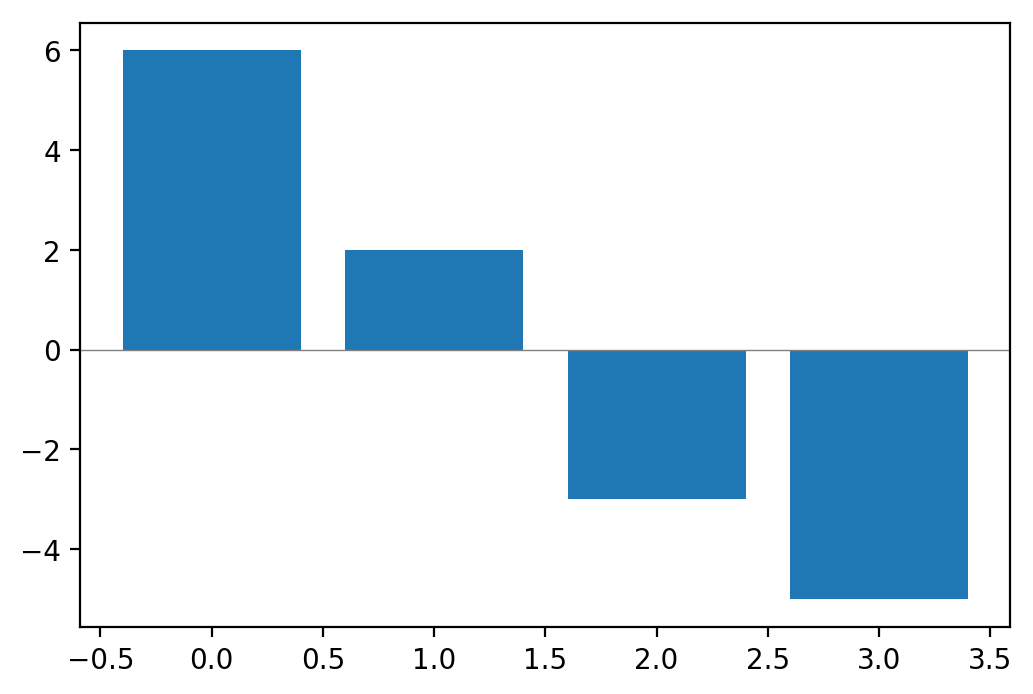

In [16]:
plt.bar(range(4), [6, 2, -3, -5])
plt.axhline(0, color='gray', linewidth=.5);  # draw a horizontal line at y=0

##### Stacked Bar Charts

Show two series for the same index:

In [17]:
companies = ['Stark\nIndustries', 'Wayne\nEnterprises', 'Lexcorp', 'Oscorp', 'ACME']
valuation = [41, 37, 31, 26, 24]
potential = [ 4,  9,  3,  5,  4]

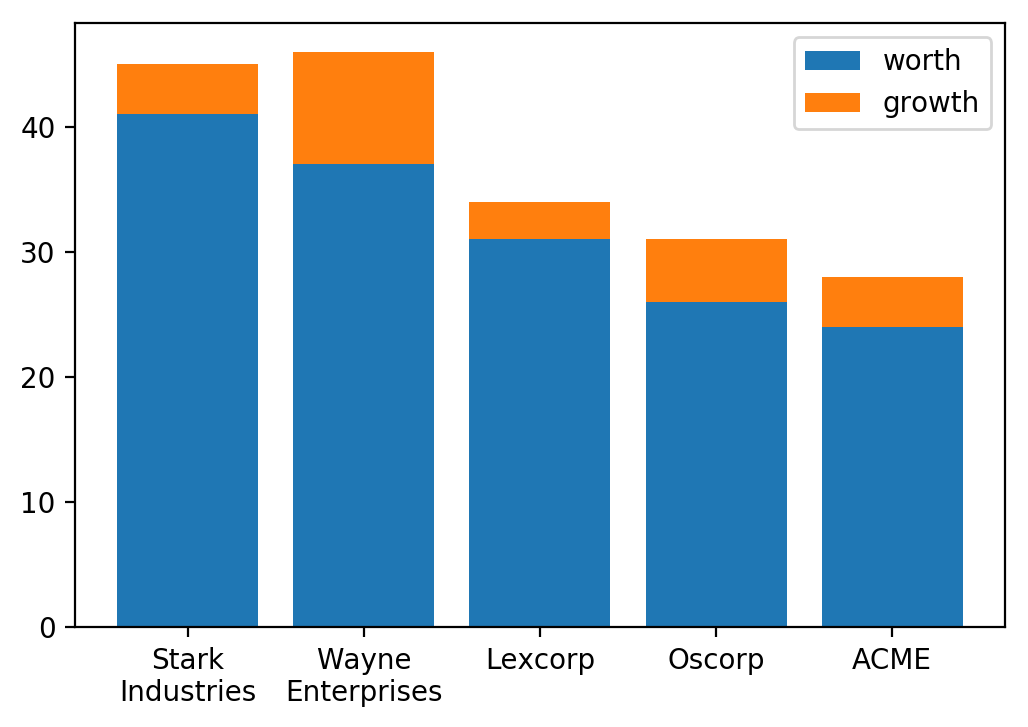

In [18]:
plt.bar(companies, valuation, label='worth')
plt.bar(companies, potential, bottom=valuation, label='growth')

plt.legend();

##### Grouped Bar Charts

Same data, but highlight differences in the second series, not in the overall sum:

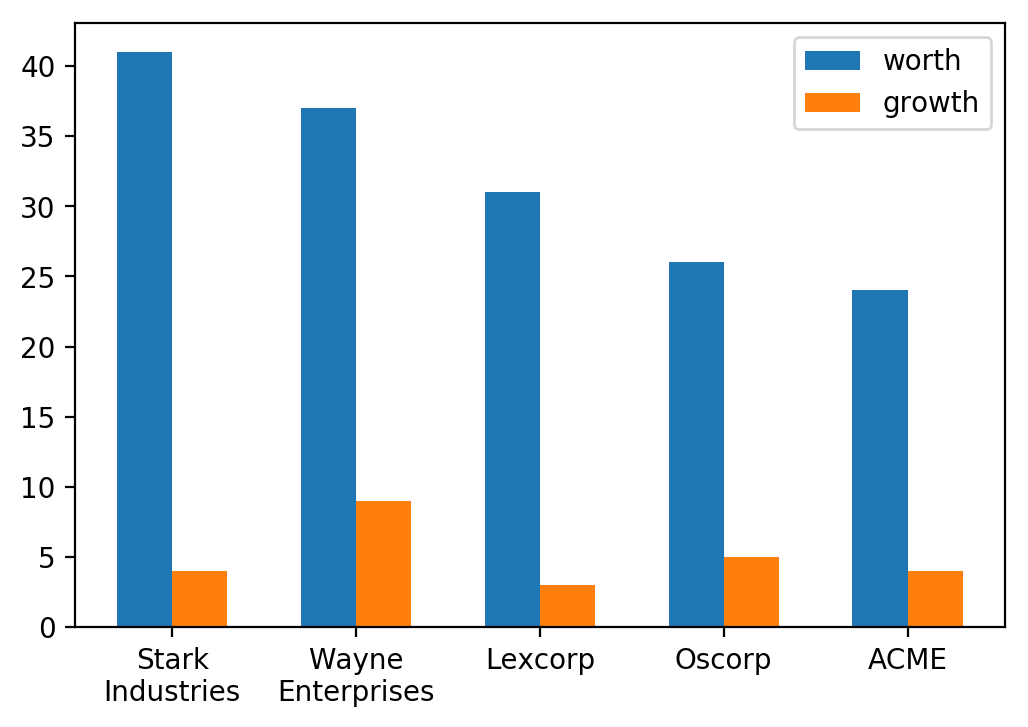

In [19]:
width = .3
x = np.arange(len(companies))

plt.bar(x,         valuation, width=width, label='worth')
plt.bar(x + width, potential, width=width, label='growth')

plt.gca().set_xticks(x + width / 2)
plt.gca().set_xticklabels(companies)
plt.legend();

##### Area Chart

Line chart where the bottom is filled:

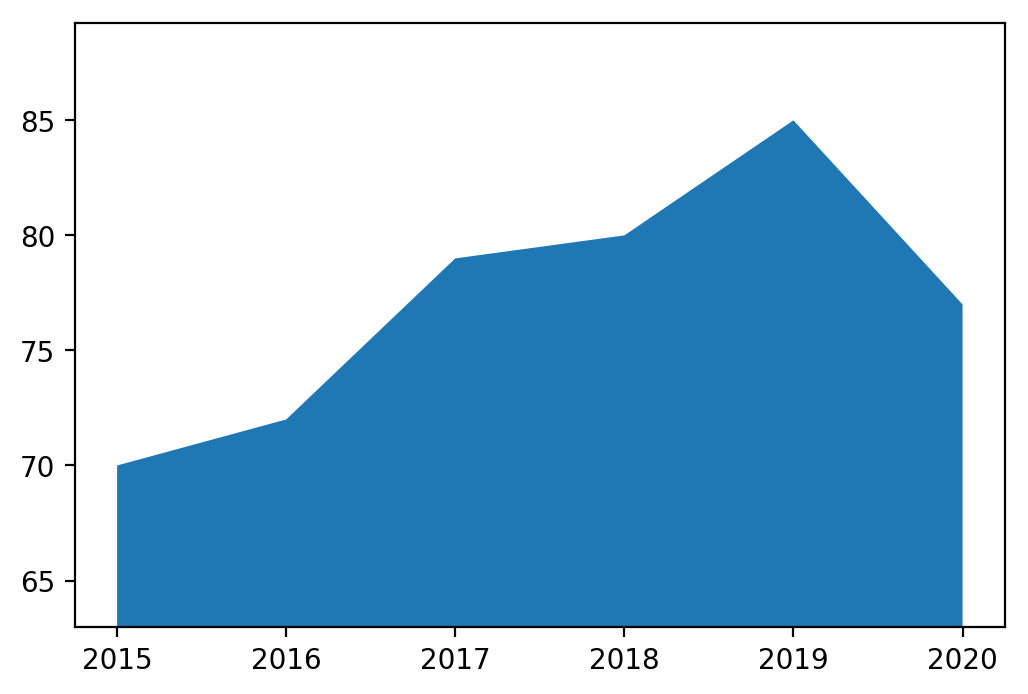

In [20]:
plt.fill_between(years, price)
plt.ylim(min(price) * .9);

##### Stacked Area Chart

Similar to stacked bar charts, but for continously-indexed series:

In [21]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
price = [  70,   72,   79,   80,   85,   77]
tax   = [   2,    4,    3,    9,    1,    2]

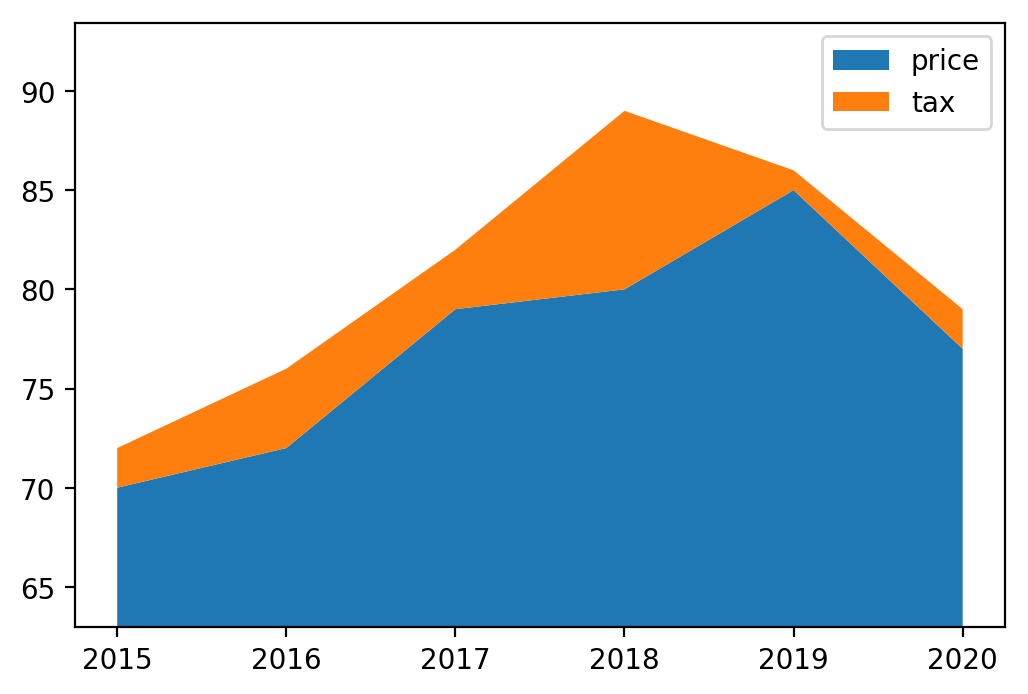

In [22]:
plt.stackplot(years, price, tax, 
              labels=['price', 'tax'])

plt.ylim(min(price) * .9)
plt.legend();

### Customization

Matplotlib features a wealth of customization options, which allow you to draw plots just the way you need them. All of the options in the following sub-sections can be combined together.

#### Line Properties

Common line (trace) options:

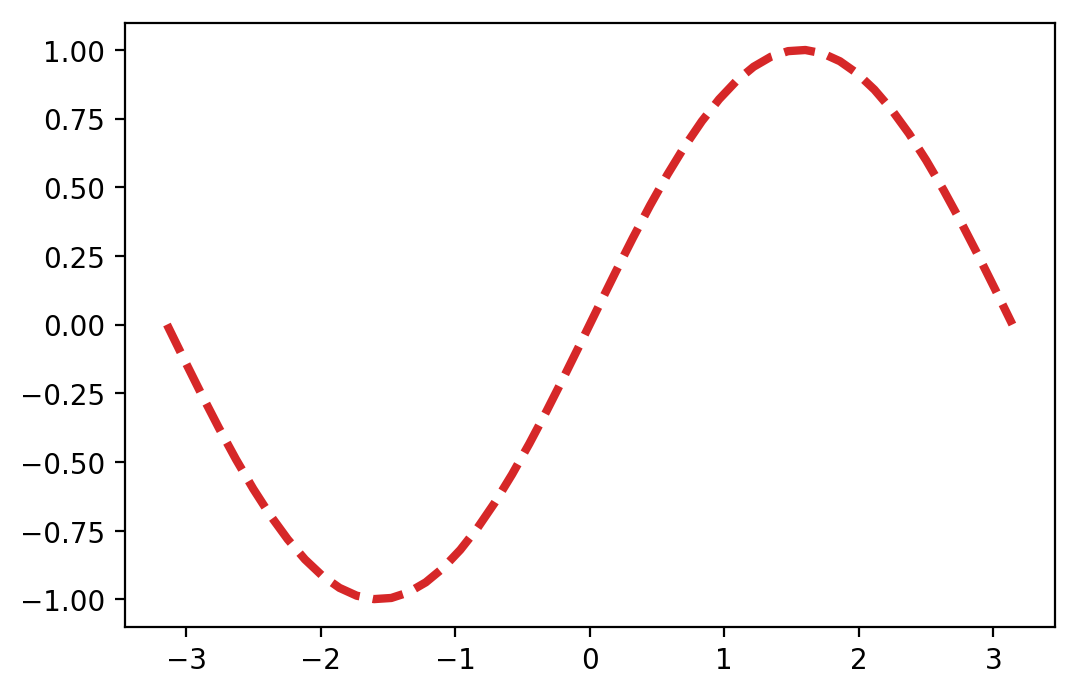

In [23]:
xs = np.linspace(-np.pi, np.pi, num=50)
ys = np.sin(xs)

plt.plot(
    xs,
    ys,

    color='C3',
    linestyle='--',
    linewidth=3,
);

Options can also be quickly given in short-form:

In [24]:
x = [1, 2, 4]
y = [5, 4, 7]

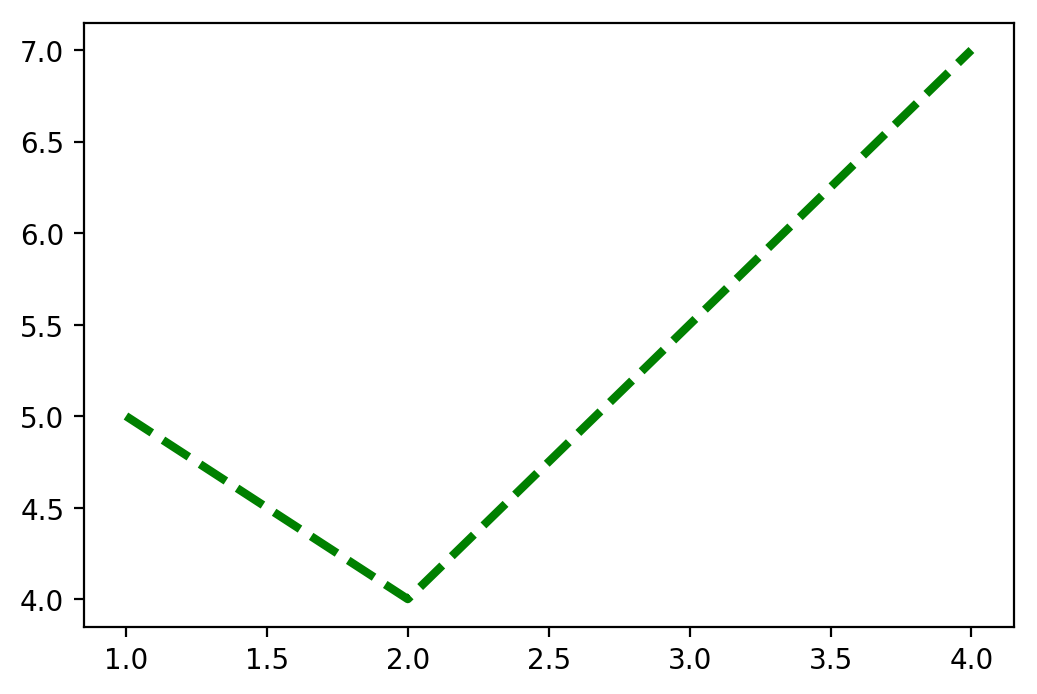

In [25]:
plt.plot(x, y, 'g--', lw=3);  # green, dashed line, width of 3

Default color palette:


![pic](https://i.imgur.com/aGT8APH.png)

**👾 Trivia**: the default color palette is designed to both readable, pleasing and have distinctive colors. It was originally developed at [Tableau](https://www.tableau.com), a powerful standalone data visualization suite. You can find out more about the choice of default style in Matplotlib [here](https://www.youtube.com/watch?v=xAoljeRJ3lU).

#### Marker Properties

Common marker (points) options. Every property can be constant, the same for all points (like `alpha`, `marker` or `edgecolor` below) or per-point (like `s` or `color` below):

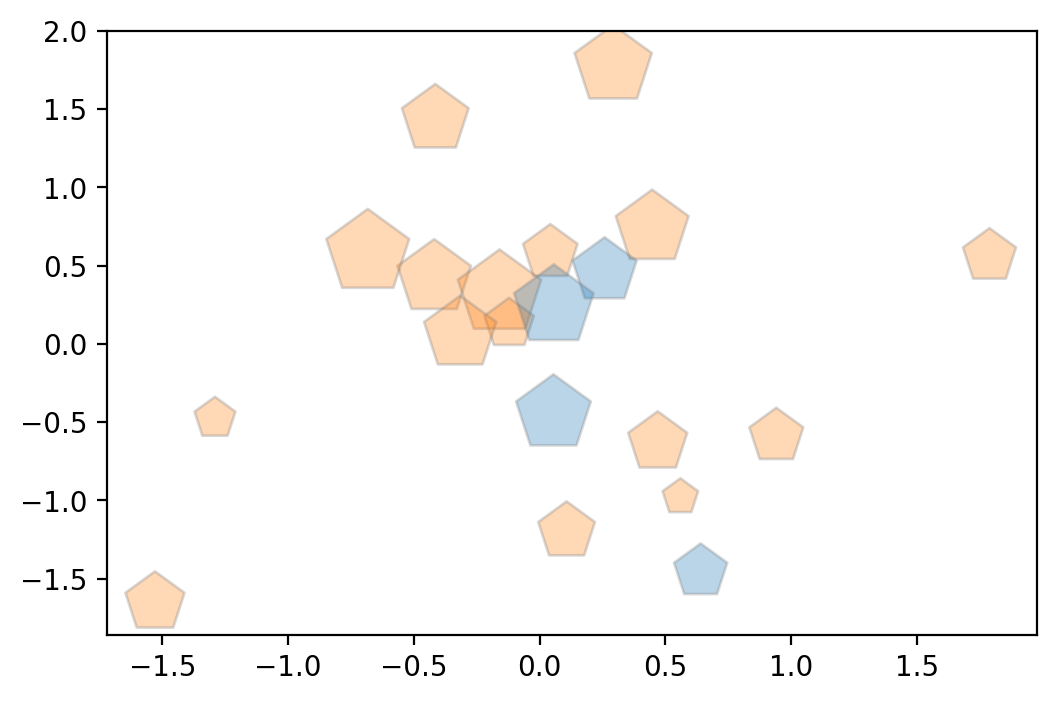

In [26]:
n_points = 20
plt.scatter(
    x=np.random.randn(n_points), 
    y=np.random.randn(n_points), 
    
    s=np.random.uniform(100, 1_000, n_points), # size
    color=np.random.choice(['C0', 'C1'], n_points),
    
    alpha=.3,  # transparency
    marker='p',  # pentagon
    edgecolor='gray',
);

**👾 Trivia**: both the American and British spellings of `gray`/`grey`. XKCD (the web-comic maker) ran a survey to see what labels do people assign to various colors. Read about the [results](https://blog.xkcd.com/2010/05/03/color-survey-results/) or explore them in this [interactive visualization](https://colors.luminoso.com).

---

Markers can also be displayed for line plots (all previous options apply as well):

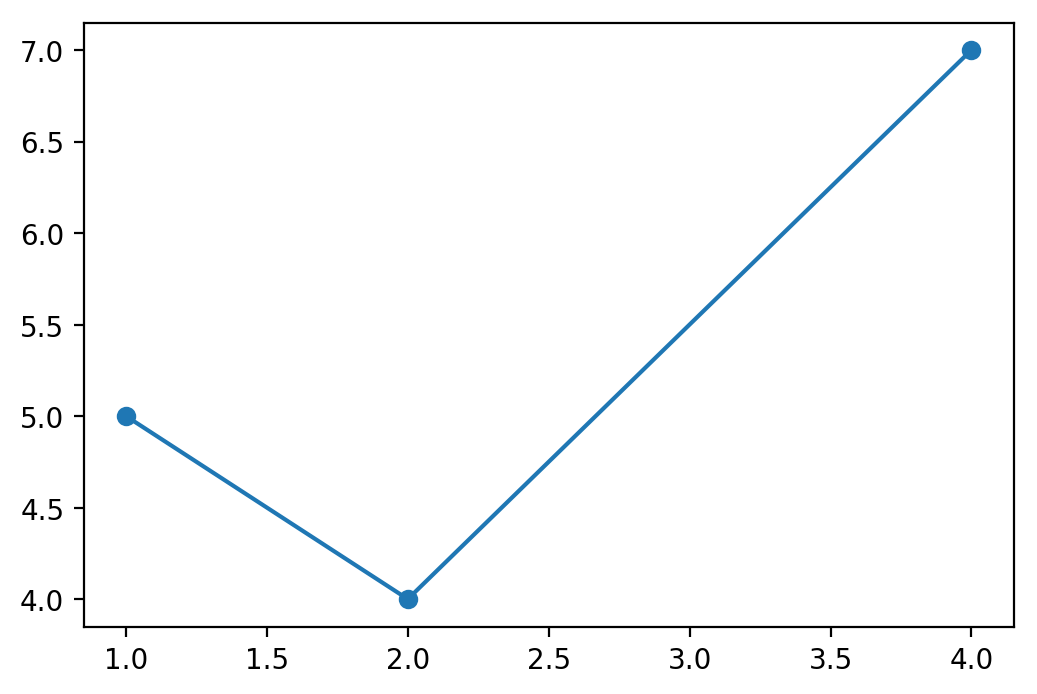

In [27]:
plt.plot(x, y, marker='o');  # circular markers

**ℹ️ Tip**: all available marker shapes are listed [here](https://matplotlib.org/api/markers_api.html)

#### Figure Properties

Nearly every element of the chart can be customized.

The vanilla chart:

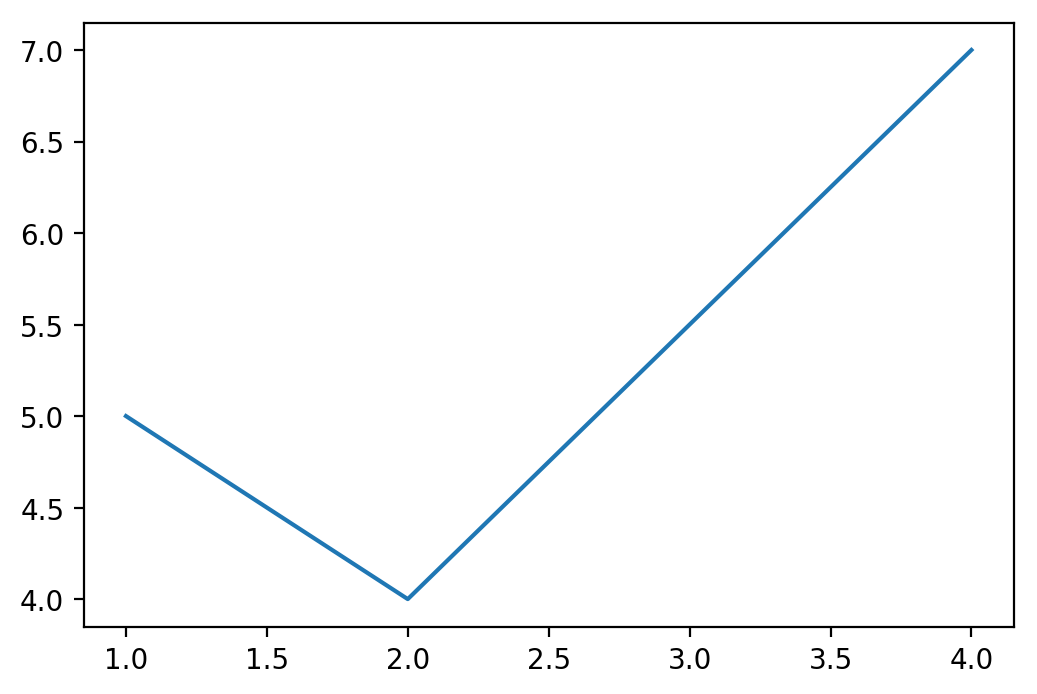

In [28]:
plt.plot(x, y);

Customized and labeled:

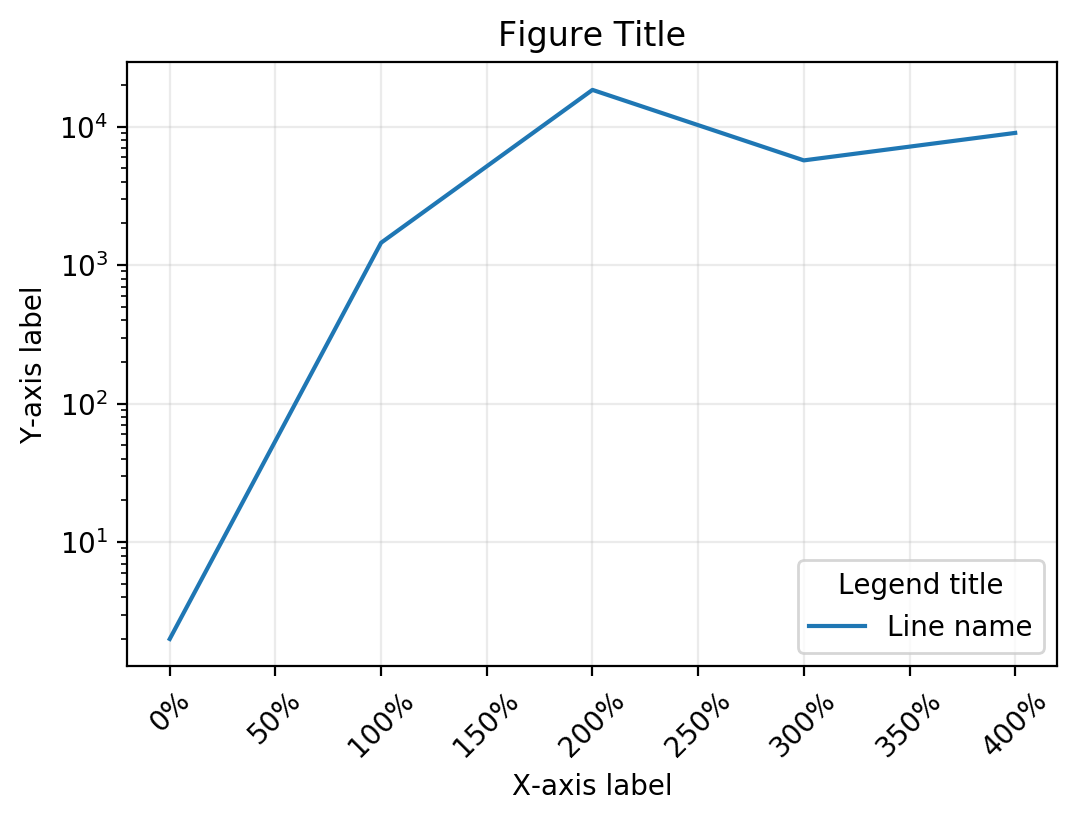

In [29]:
plt.plot([2, 1450, 18400, 5700, 9000], label='Line name')

plt.title('Figure Title')
plt.legend(title='Legend title', loc='lower right')

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')

plt.grid(alpha=.25)
plt.gca().set_yscale('log')

plt.gca().set_xticklabels([f'{x:.0%}' for x in plt.gca().get_xticks()], rotation=45);

**ℹ️ Tip**: refer to the [Parts of a Figure](https://matplotlib.org/tutorials/introductory/usage.html#parts-of-a-figure) for more detailed descriptions about each part of the figure:

![pic](https://matplotlib.org/_images/anatomy.png)

**ℹ️ Tip**: aim for a high [ink-to-data ratio](https://infovis-wiki.net/wiki/Data-Ink_Ratio), avoid over-encumbering the chart with too many elements.

**ℹ️ Tip**: don't let the audience guess what the data represents. Annotate charts with a title and axis labels at the least. If a person randomly opens the book and lands on your chart, they should be able to understand what's going on. If possible, add a short description and an accompanying conclusion.

**ALWAYS PROVIDE LABELS!**

---

**ℹ️ Tip**: remove just tick markers and labels (not axis labels or grids) with `plt.xticks([])`.

#### Axes Limits

Change axes limits with `plt.xlim`/`plt.ylim`

In [30]:
from matplotlib.ticker import FuncFormatter

def plot_companies_worth():
    plt.bar(companies, valuation)
    plt.ylabel('Worth (billions)')
    
    formatter = FuncFormatter(lambda y, pos: f'${y:.0f}')
    plt.gca().locator_params(axis='y', nbins=5)  # number of ticks
    plt.gca().yaxis.set_major_formatter(formatter)  # tick label format

**ℹ️ Tip**: you can also provide a formatter for the tick labels, and specify the number of ticks (shown in the example above), or specify the spacing between ticks (`ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(tick_spacing)`).

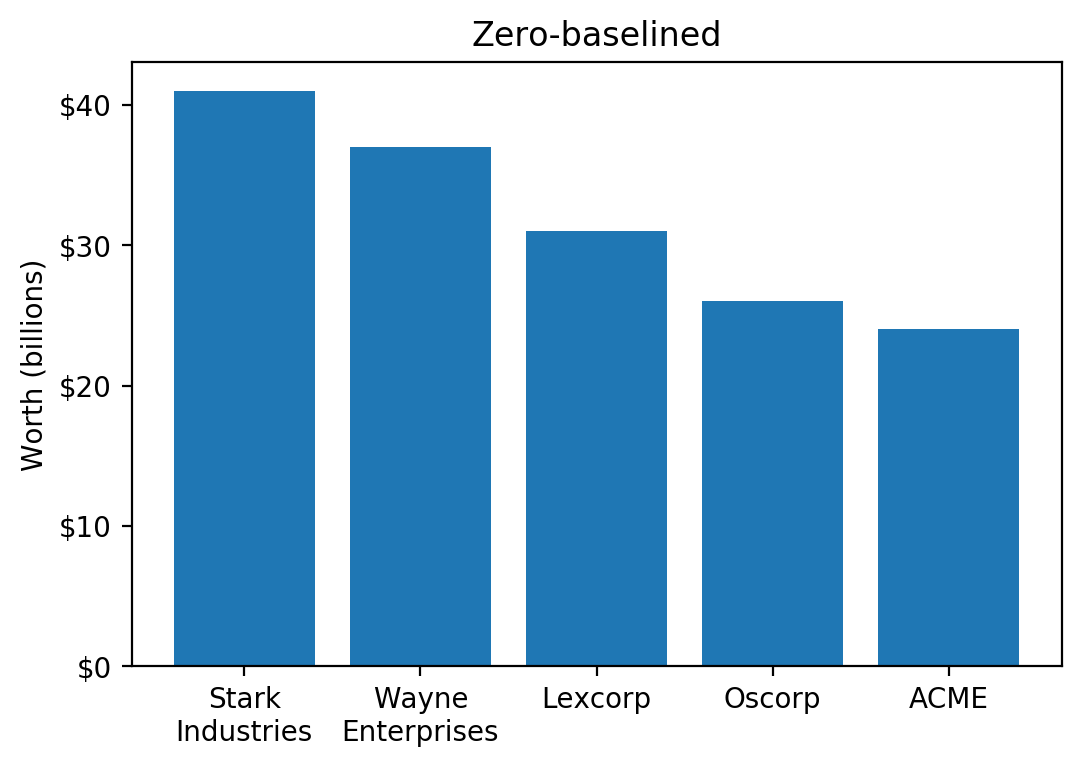

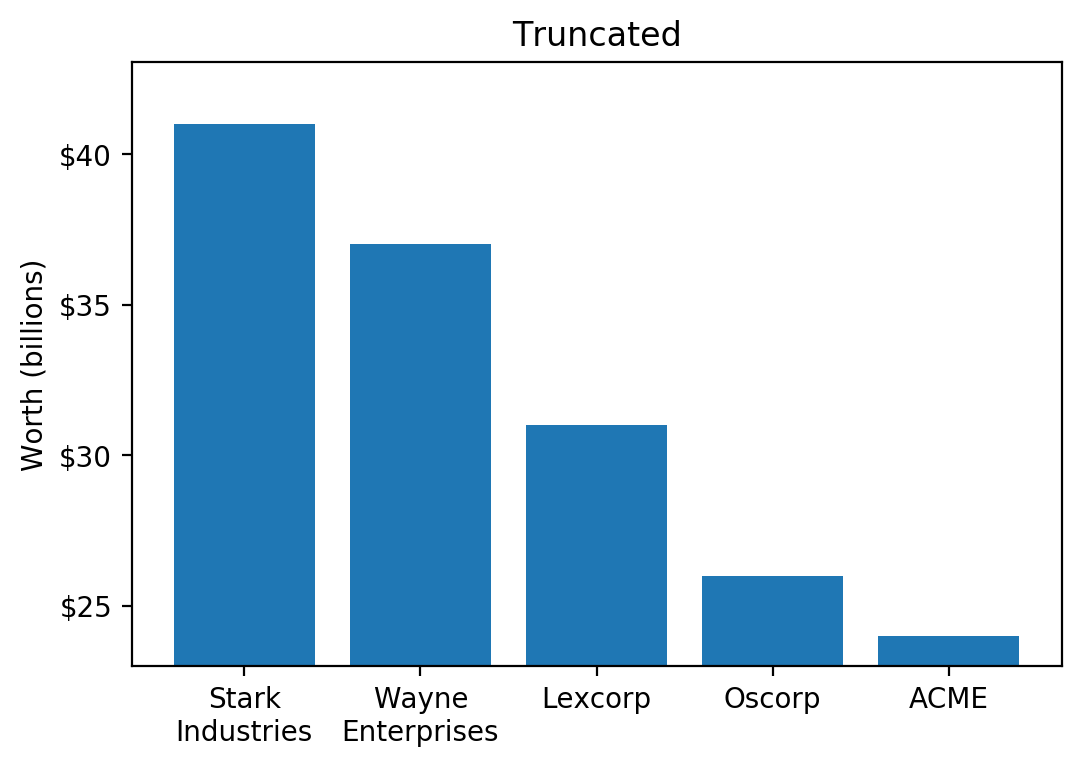

In [31]:
plot_companies_worth()
plt.title('Zero-baselined')
plt.show()

plot_companies_worth()
plt.title('Truncated')
plt.ylim(23);

**ℹ️ Tip**: Bar charts ask viewers compare the relative lengths. Showing just the tips of the bars to exaggerate differences in the data, their relative lengths changes. So people are either misled and take away the wrong message, or end up having to read the numbers, which defeats the purpose of the chart. There are exceptions.

The issue is even more pronounced when non-abstract figures are presented. For example, the average Dutch person is not three times as tall as the average Filipino:

![img](https://i.redd.it/tvxqbdux6uqz.jpg)

Ineffective tick labels might as well not be written at all:

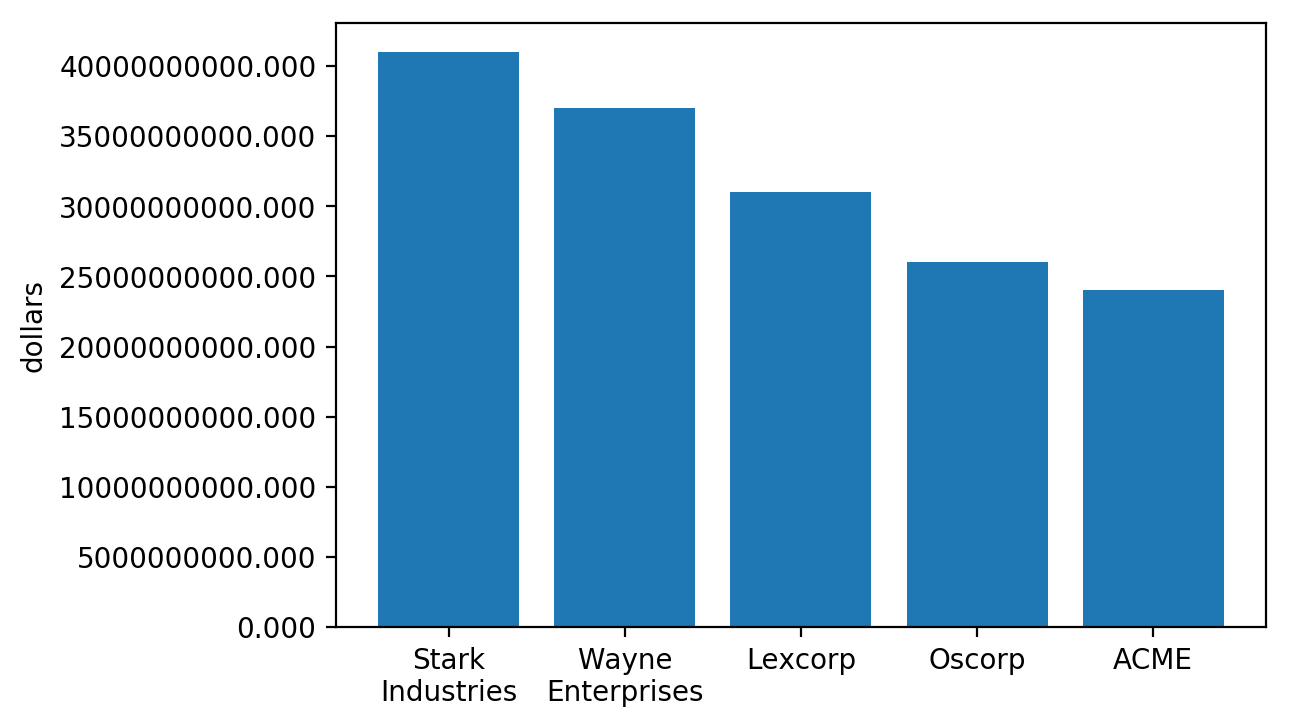

In [32]:
plt.bar(companies, np.array(valuation) * 1_000_000_000)

plt.gca().set_yticklabels([f'{x:.3f}' for x in plt.gca().get_yticks()])
plt.ylabel('dollars');

**ℹ️ Tip**: provide effective labels:
- do not mistake the measurement with the units — in the above example, we are showing the _worth_, not the _dollars_ for each company.
- declutter the tick marks, while provide the same information — in the above example, since all valuations are provided in billions, it is easier to specify it in the axis label
- show appropriate units on the tick labels (e.g.: `$`, `★`, etc)
- show percentage values as percentages (e.g.: show `50%` instead of the way it is stored, `0.5`)
- show an appropriate amount of decimals — more decimal digits might indicate more precision, but they reduce readability without adding actual value
- sometimes it is useful to provide the value labels at the top of each bar
- capitalize axes labels like you would table headers (capitalize first word)

#### Aspect Ratio

Change the figure size (and aspect ratio):

In [33]:
def plot_price_evolution():
    plt.plot(years, price)
    plt.gca().set_yticklabels([f'${y:.0f}' for y in plt.gca().get_yticks()])
    plt.ylabel('Price')

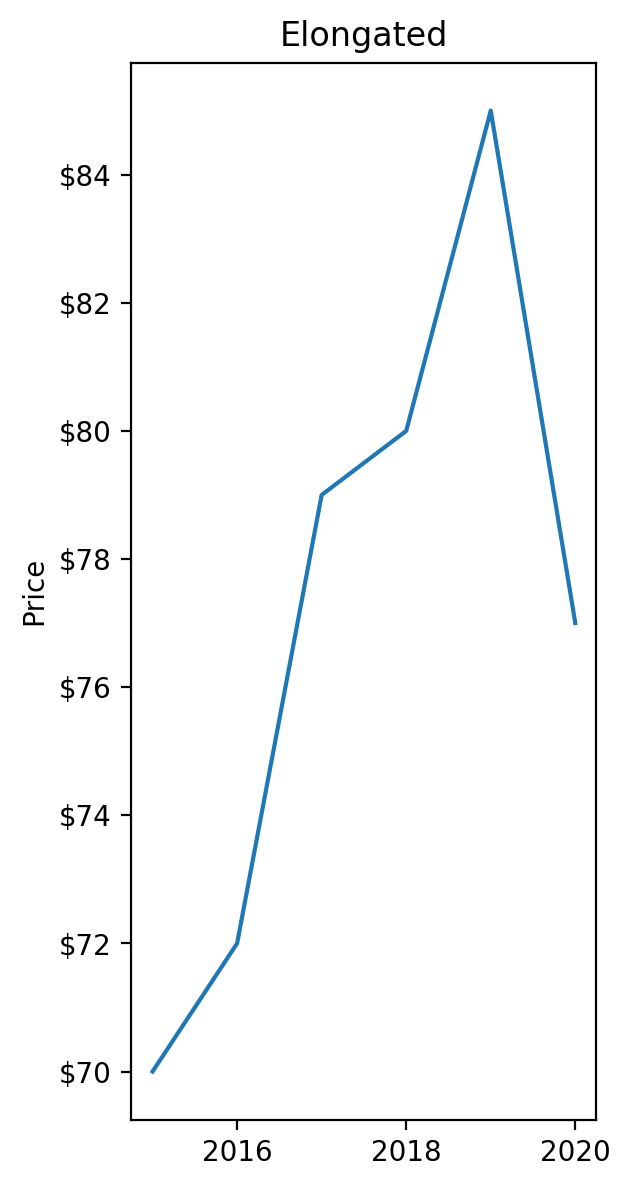

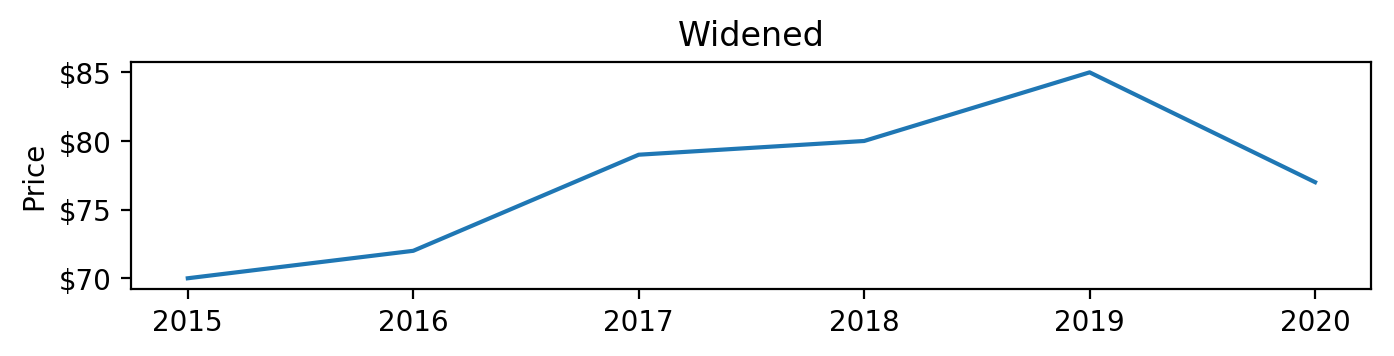

In [34]:
plt.figure(figsize=(3, 7))  # in "inches"
plot_price_evolution()
plt.title('Elongated')

plt.figure(figsize=(8, 1.5))
plot_price_evolution()
plt.title('Widened');

**ℹ️ Tip**: Line charts show a trend. Stretching the height of the graph can overblow the message, while stretching the width can understate it. This leads to misleading the audience.

### Multiple Plots

Chart multiple sets of data at once, either in the same figure, different ones, or composite figures.

#### Same figure

Plot multiple lines/points in a single figure by placing multiple statements in the same cell (or between `plt.show()` calls):

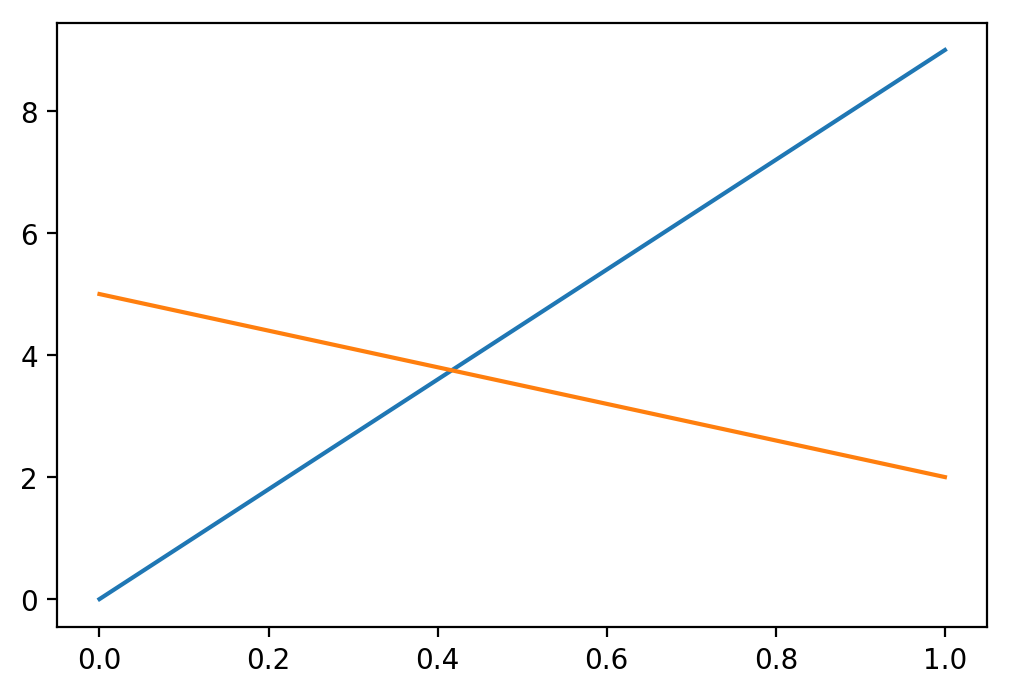

In [35]:
plt.plot([0, 9])
# plt.scatter([1, 4, 2, 3], [2, 1, 4, 5])
plt.plot([5, 2]);

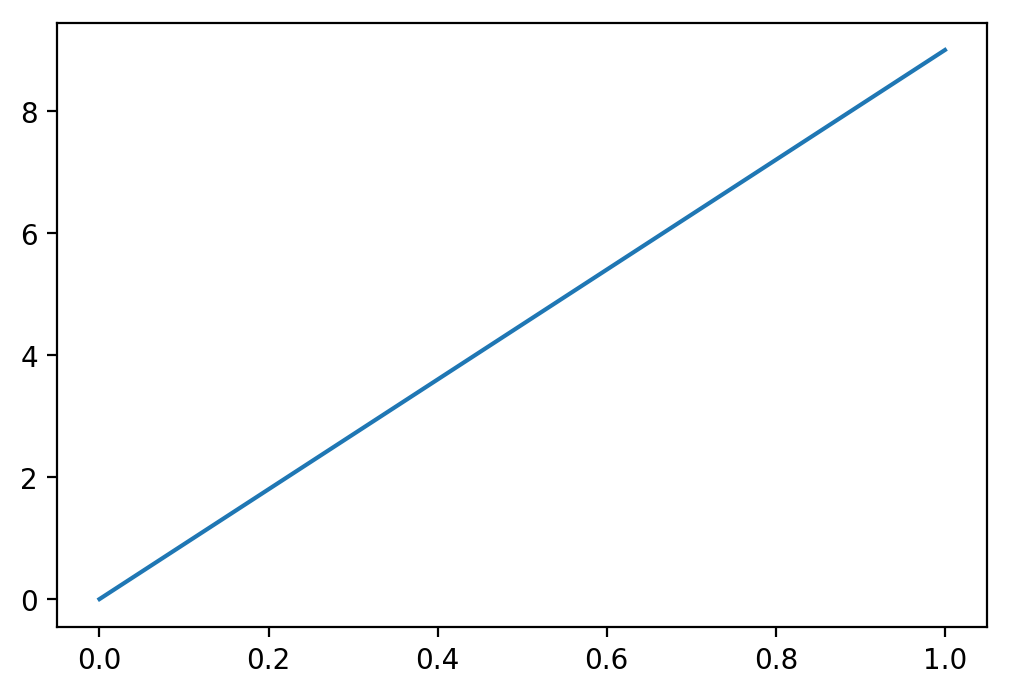

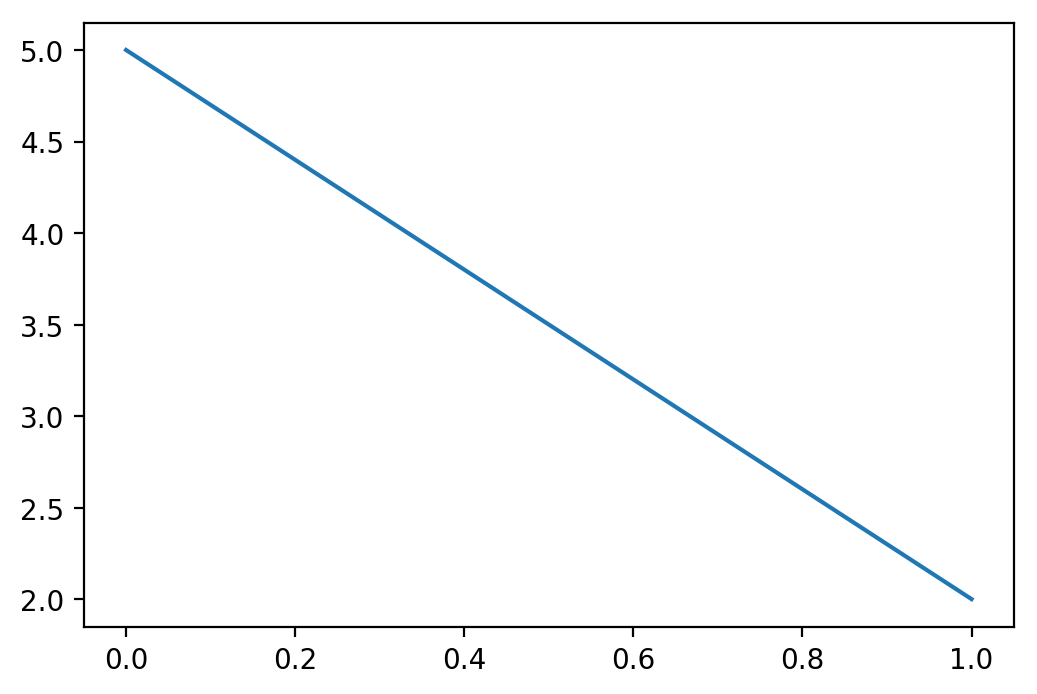

In [36]:
plt.plot([0, 9])
plt.show()
plt.plot([5, 2]);

#### Multiple Figures

Preserve the same Y-axis limits:

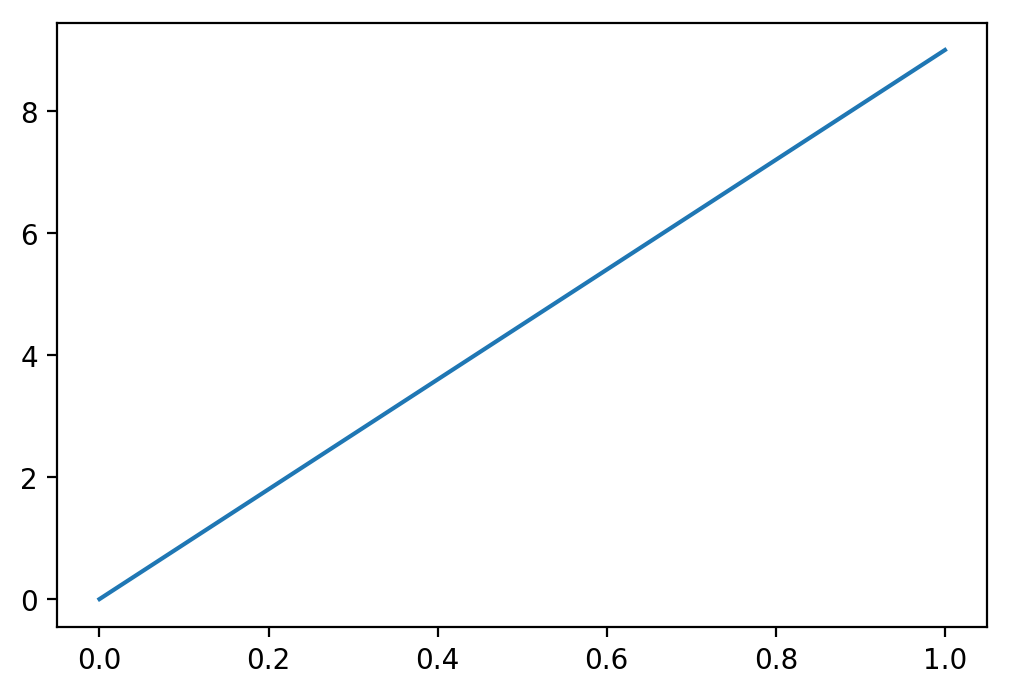

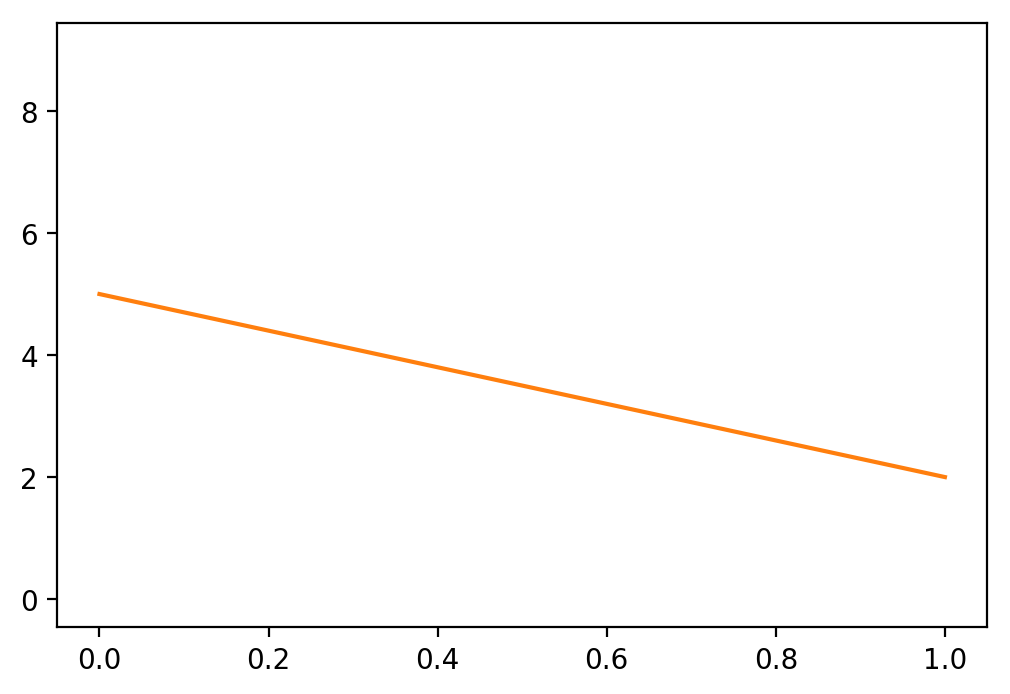

In [37]:
plt.plot([0, 9])
y_limits = plt.ylim()
plt.show()

plt.ylim(y_limits)
plt.plot([5, 2], c='C1');

#### Subplots

A figure is composed of one or more axes. When only one is present, `plt.` refers to it, otherwise it refers to the current figure & axis. You can get the figure & axis handles either by instantiating a new figure with `fig = plt.figure()`, creating subplots (see below) or directly from traces, `ax = plt.plot(...)`.

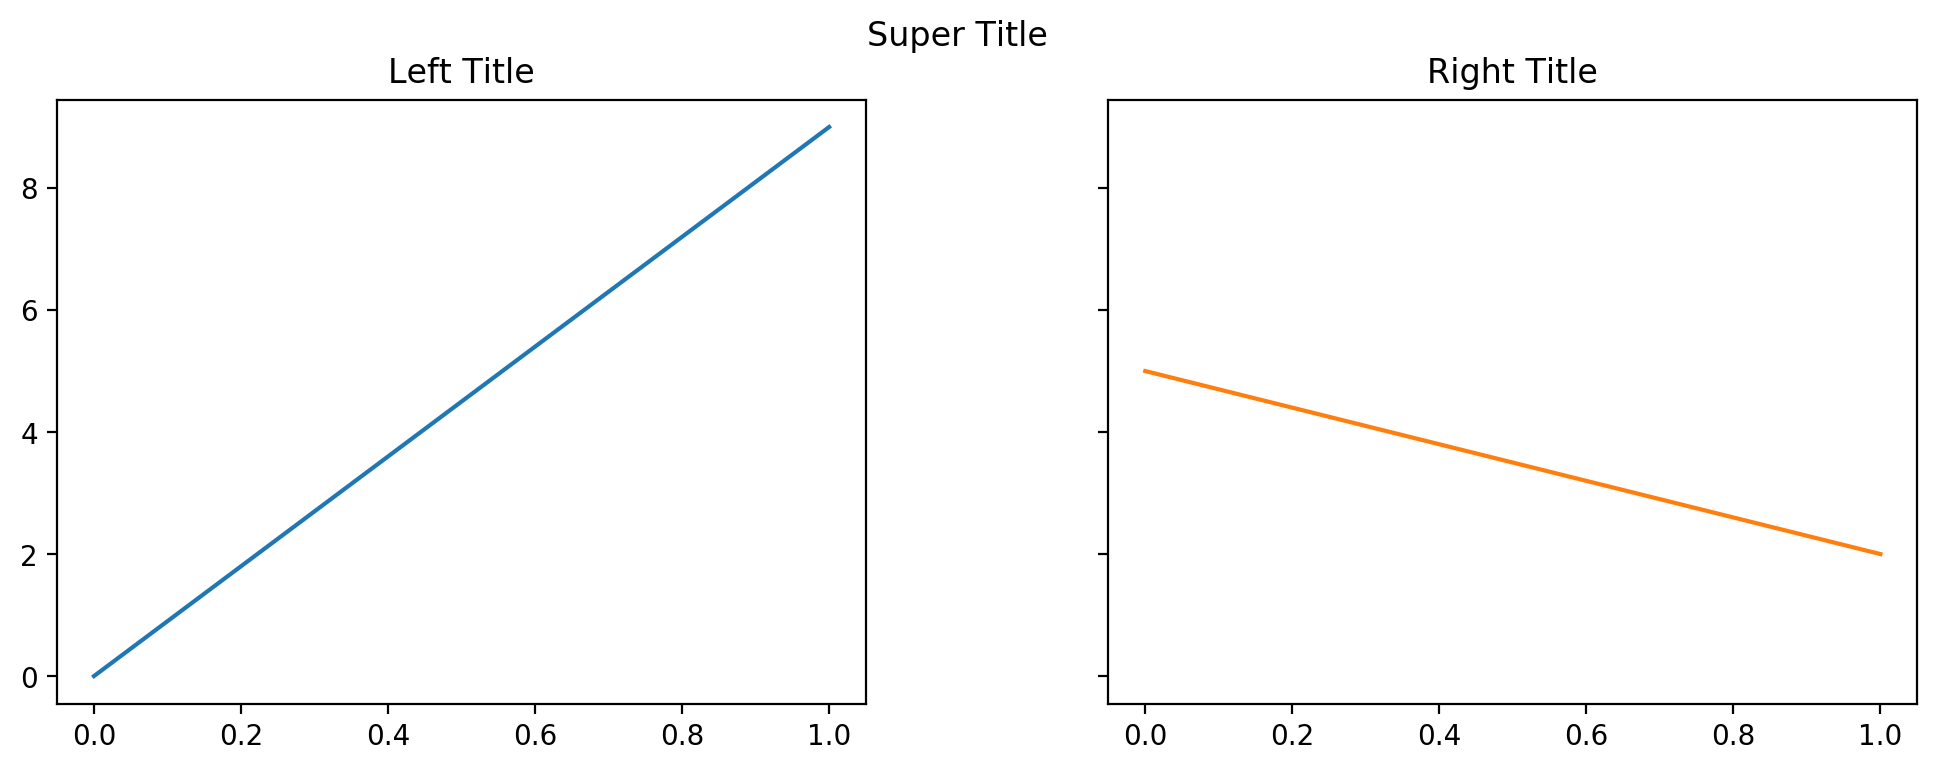

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, 
                               sharey=True, # size of the entire figure, not of individual plots
                               figsize=(12, 4))

ax1.plot([0, 9])  # note that we plot using `ax.plot` not `plt.plot`
ax2.plot([5, 2], c='C1')

plt.subplots_adjust(wspace=.3)

ax1.set_title('Left Title')  # note the slightly changed syntax `ax.set_title(...)` instead of `plt.title(...)`
ax2.set_title('Right Title')
plt.suptitle('Super Title');

**ℹ️ Tip**: get the current axis with `plt.gca()` and the current figure with `plt.gcf()`.

Alternatively, in short-form:

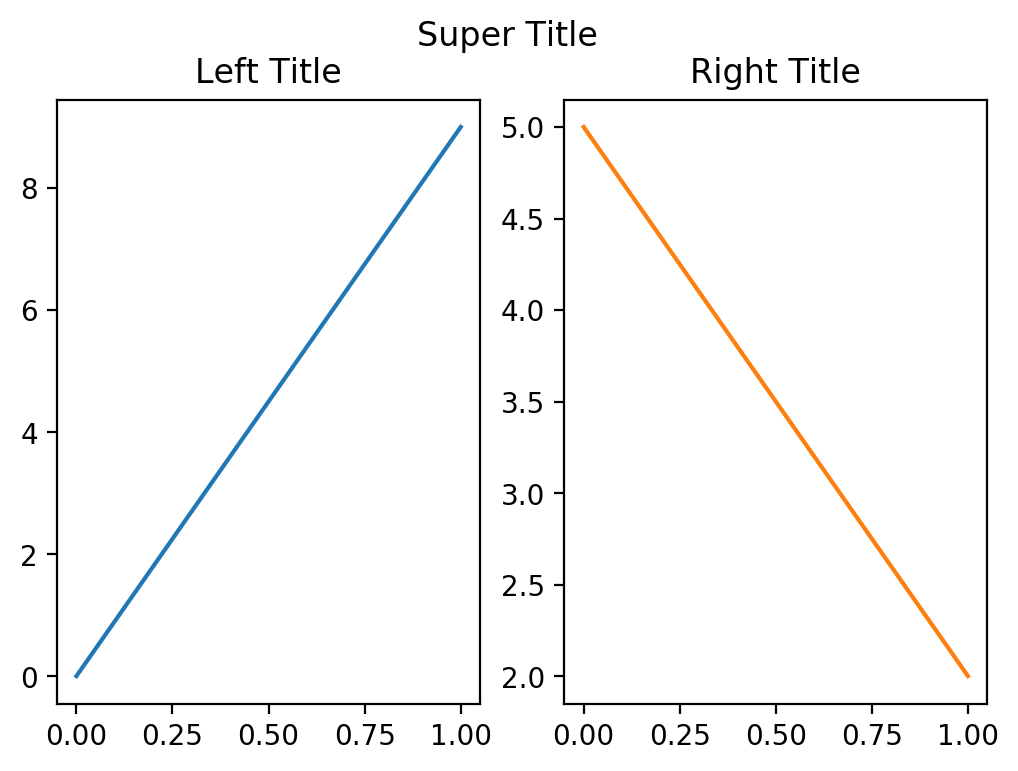

In [39]:
plt.subplot(1, 2, 1)  # now it's `subplot`, not `subplots`
plt.plot([0, 9])  # now it's `plt.plot`
plt.title('Left Title')

plt.subplot(122)  # can be compacted into a single number (when coordinates are below 10)
plt.plot([5, 2], c='C1');
plt.title('Right Title')

plt.suptitle('Super Title');

The following diagrams helps visualize how `subplot` operates:

- Single row:

![2](http://scipy-lectures.org/_images/sphx_glr_plot_subplot-vertical_001.png)


- Single column: 

![1](http://scipy-lectures.org/_images/sphx_glr_plot_subplot-horizontal_001.png) 


- Multiple rows and columns:

![3](http://scipy-lectures.org/_images/sphx_glr_plot_subplot-grid_001.png)

**ℹ️ Tip**: read more about [working with multiple figures and axes](https://matplotlib.org/tutorials/introductory/pyplot.html#working-with-multiple-figures-and-axes).

#### Twin Axes

Plot two sets of data on completely different scales:

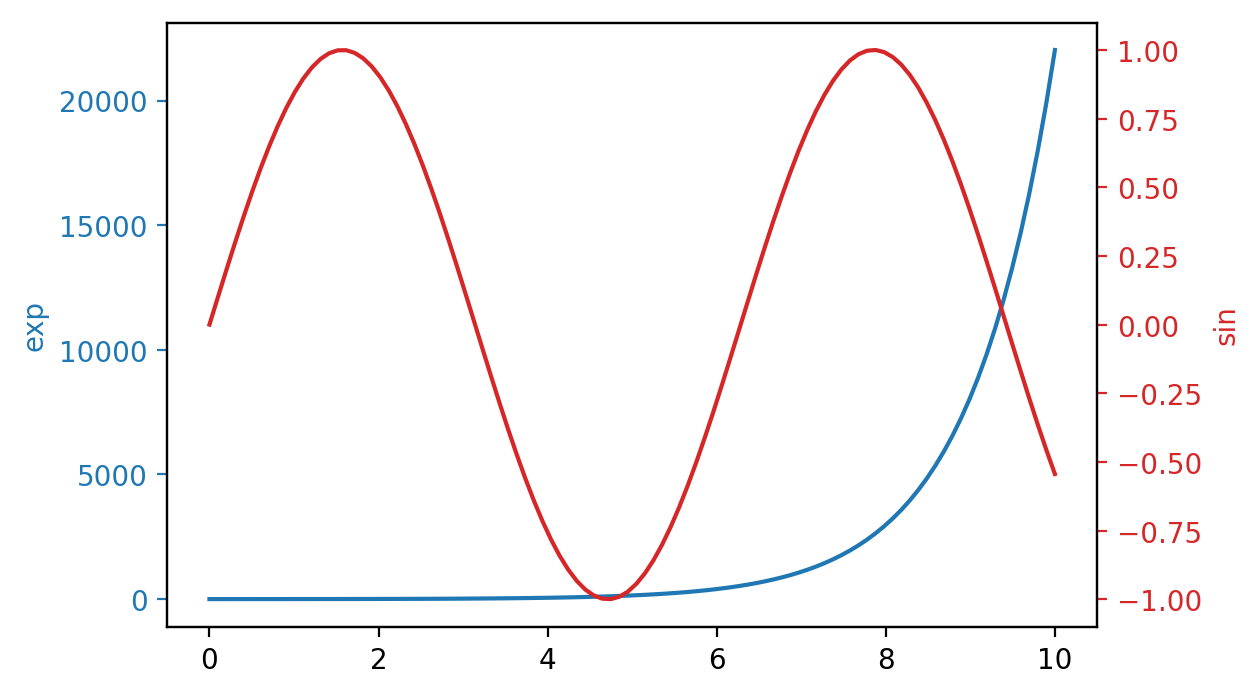

In [40]:
x = np.linspace(0, 10, 100)
y1 = np.exp(x)
y2 = np.sin(x)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(x, y1, 'C0')
ax1.set_ylabel('exp', color='C0')
ax1.tick_params('y', colors='C0')

ax2.plot(x, y2, 'C3')
ax2.set_ylabel('sin', color='C3')
ax2.tick_params('y', colors='C3')

**ℹ️ Tip**: charting with two different scales can be confusing and suggest a relationship that may not exist. The viewer compares the magnitude of values between the two sets of data, which is meaningless given that the scales (and potentially units) are different.

**👾 Trivia**: check out more (oftentimes humorous) [spurious correlations](http://www.tylervigen.com/spurious-correlations) such as this one:

![a](http://www.tylervigen.com/chart-pngs/2.png)

### The Effectiveness of Simplicity

Simplicity is the most effective way to convey your message. Remove anything that doesn't support the message and design for comprehension. 


Matplotlib provides sensible defaults, but exessive coloring and other customizations can still degrade a chart. While it is true that an attractive visualization causes better audience engagement and increases openness to the message conveyed, it should never be preferred over readability.

In particular, depth effects and meaningless colors only make the information harder to read, for example this chart:

![pic](https://i.imgur.com/vjGI5yO.jpg)

The above chart can be improved significantly:
 - flatten
 - drop meaningless colors
 - order X-axis chronologically
 - do not duplicate X-axis values, make groups (day/night)
 - provide Y-axis meaning and units

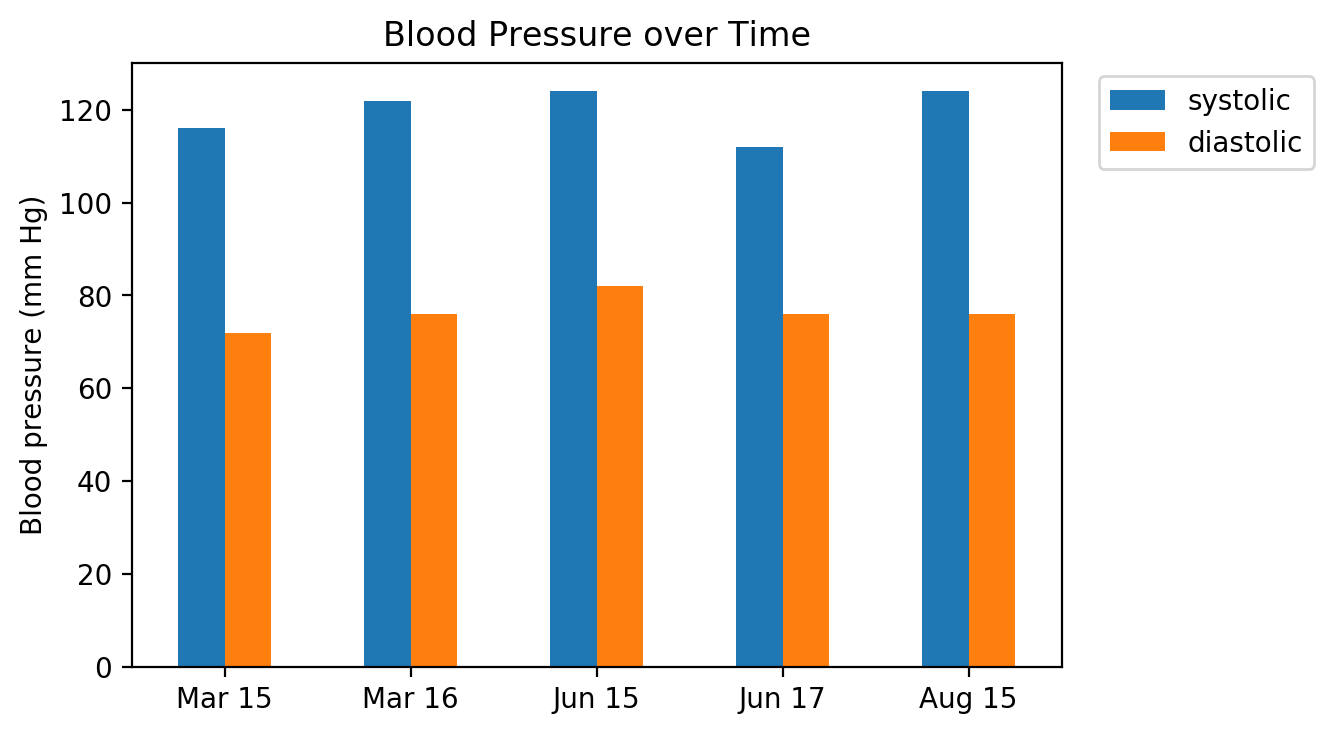

In [41]:
df = pd.DataFrame({
    'systolic':  [116, 122, 124, 112, 124],
    'diastolic': [ 72,  76,  82,  76,  76],
}, index=['Mar 15', 'Mar 16', 'Jun 15', 'Jun 17', 'Aug 15'])

df.plot(kind='bar', rot=0)
plt.title('Blood Pressure over Time')
plt.ylabel('Blood pressure (mm Hg)')
plt.gca().legend(bbox_to_anchor=(1.025, 1));

We could go even further, using twin axes, with scale of the normal range.

**ℹ️ Tip**: by default, the legend is placed in the location with the most available whitespace. Manually place it it (even outside of the figure) by specifying the top-left coordinate of the legend box (in terms of figure width and height, with `(0, 0)` being bottom left).

**👾 Trivia**: if you'd like to try spotting some of these errors yourself, check out [this gallery](https://old.reddit.com/r/dataisugly/top/?t=all) of bad visualizations.

---

Save a figure to disk `plt.savefig(path, dpi, format)`, or drag-n-drop it directly from the Jupyter interface.

## Further reading

 - Matplotlib tutorials:
  - [official crash course](https://matplotlib.org/users/pyplot_tutorial.html)
  - [official, in-depth](https://matplotlib.org/tutorials/index.html)
  - [unofficial](https://www.labri.fr/perso/nrougier/teaching/matplotlib/), based on the one [from scipy](http://scipy-lectures.org/intro/matplotlib/matplotlib.html)
 - Python Data Visualization Packages: [talk](https://www.youtube.com/watch?v=FytuB8nFHPQ)
 - Python Graphs: [gallery](https://python-graph-gallery.com) (not exclusively Matplotlib/Seaborn)
 - Articles providing concise and useful tips and caveats:
  - https://www.geckoboard.com/learn/data-literacy/data-visualization-tips/
  - https://www.data-to-viz.com/caveats.html
  - https://www.columnfivemedia.com/25-tips-to-upgrade-your-data-visualization-design
  - https://www.lovesdata.com/blog/data-visualization-tips
  - https://www.tableau.com/about/blog/2016/5/5-tips-effective-visual-data-communication-54174
  - https://www.dataquest.io/blog/design-tips-for-data-viz/
 - Collections of beautiful, effective visualizations:
  - [Flowing Data](https://flowingdata.com)
  - [r/DataIsBeautiful](https://www.reddit.com/r/dataisbeautiful/top/?sort=top&t=all) (user voted)
  - [Tableau Gallery](https://public.tableau.com/en-us/s/gallery) (more intricate)
  - [The Pudding](https://pudding.cool) (visual essays)
  - [Seeing Theory](https://seeing-theory.brown.edu) (visual introduction to probability and statistics)
 - Books:
  - [Edward Tufte](https://www.edwardtufte.com/tufte/books_vdqi) (renown statistician and data visualization pioneer)
  - [How to Lie with Statistics](https://www.amazon.com/How-Lie-Statistics-Darrell-Huff/dp/0393310728) (explores mis-uses of data visualizations)
  - [Universal Principles of Design](https://www.amazon.com/Universal-Principles-Design-William-Lidwell/dp/1592530079) (pertaining to an abundance of fields and contexts, not just data visualization)